# __House Price Prediction - Kaggle__

In [1]:
# Import required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib # For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")

# Magic Functions for In-Notebook Display

%matplotlib inline

Pandas Version : Pandas 0.25.1
Numpy Version : Numpy 1.16.5
Matplotlib Version : Matplotlib 3.1.1
Seaborn Version : Seaborn 0.9.0


In [2]:
# Import Dataset

df = pd.read_csv('train.csv')

### __Exploratory Data Analysis (EDA)__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Check number of Rows and Columns

print('Train Data(Rows, Columns): ', df.shape)

Train Data(Rows, Columns):  (1460, 81)


In [5]:
# Change column name to lower case:

df.columns = map(str.lower, df.columns)
print(df.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [6]:
# Check first five rows

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Summary of dataset

df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


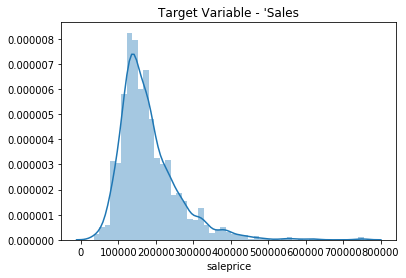

In [8]:
# Visualize target variable 

sns.distplot(df['saleprice'])
plt.title('''Target Variable - 'Sales''' )
plt.show()

### __Observation:__

> - Target variable is not normally distributed.
> - It is positively skewed hence, mean of sale price is greater than the median.
> - Less number of expensive houses in the dataset.

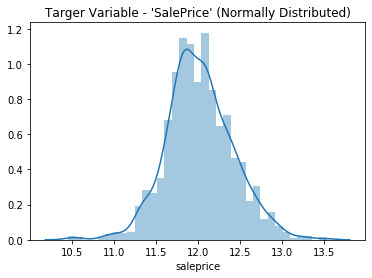

In [9]:
# Make target variable Normally Distributed using log function

df['saleprice'] = np.log(df.saleprice)

sns.distplot(df['saleprice'])
plt.title('''Targer Variable - 'SalePrice' (Normally Distributed)''')
plt.show()

### __Now Data in target variable is normally distributed.......!!!!!__

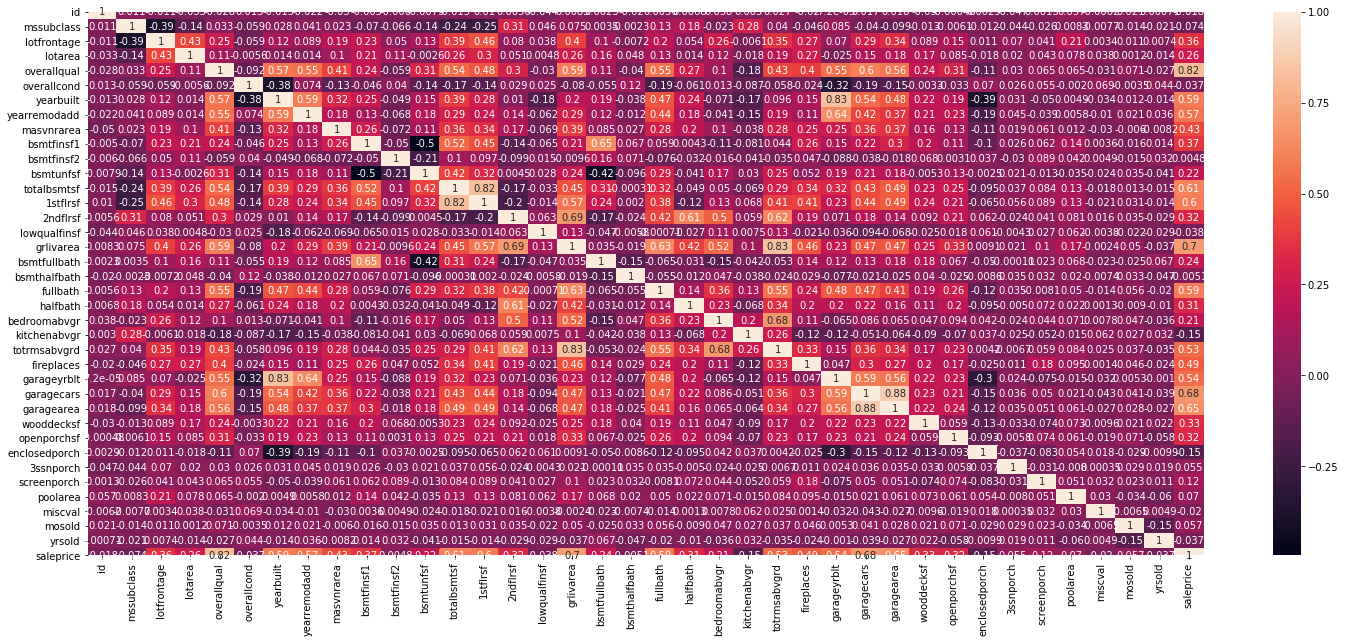

In [10]:
# Visualize correlation of numerical variable with SalePrice using heatmap

df_corr = df.select_dtypes(include = [np.number])
corr = df_corr.corr()
plt.subplots(figsize = (25,10))
sns.heatmap(corr, annot = True)
plt.show()

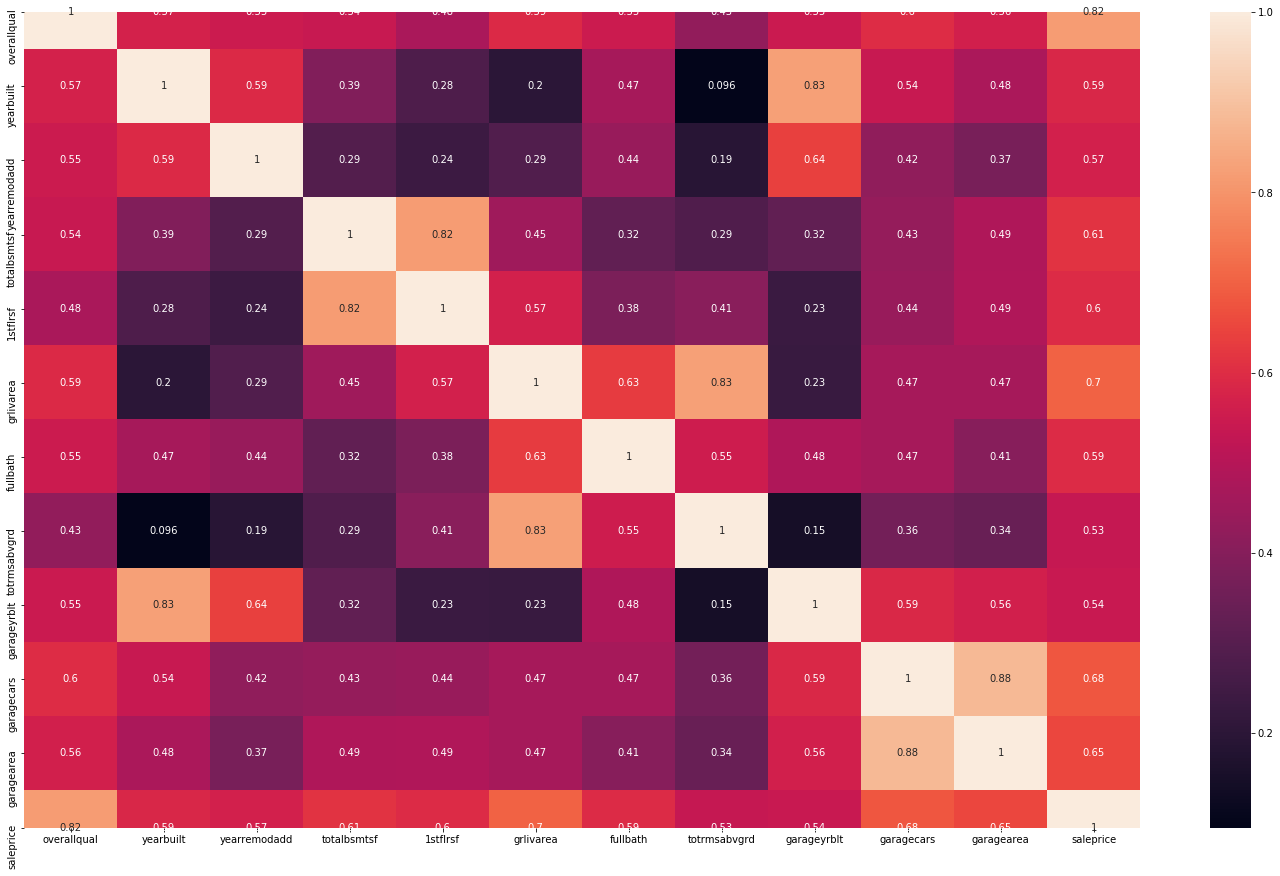

In [11]:
# Visualize variable with Correlation greater than 0.5 using heatmap

max_corr = corr.index[abs(corr['saleprice']>0.50)]
plt.subplots(figsize = (25,15))
max_corr = df[max_corr].corr()
sns.heatmap(max_corr, annot = True)
plt.show()

### __Observation:__

> - overallqual and grlivarea are highly correlated as compare to other variables.

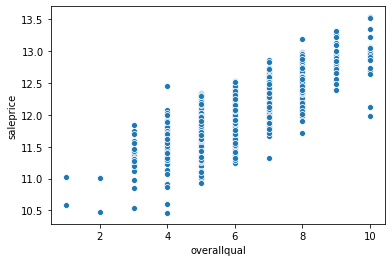

In [12]:
# Visualize the relation of overall quality with saleprice as it is highly correlated

sns.scatterplot(x = df.overallqual , y = df.saleprice )
plt.show()

### __Observation:__

As we know that the price of a house depend on its quality, similarly here we can see that the Overall Quality has a positive relation with sale price. Low quality house has lower prices and as the quality increases the price increases.

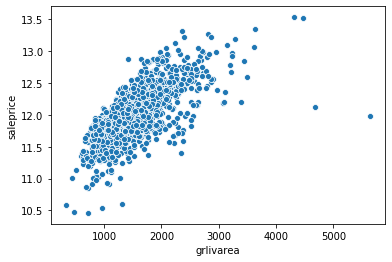

In [13]:
# Visualize the relation of overall quality with saleprice as it is highly correlated

sns.scatterplot(x = df.grlivarea, y = df.saleprice )
plt.show()

### * __Grlivarea__ has positive correlation with the target variable

# Pre Processing

In [14]:
# Checking Null value columns

df.columns[df.isnull().any()]

Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence',
       'miscfeature'],
      dtype='object')

In [15]:
# Missing value counts in each these columns

null= df.isnull().sum()
null = null[null > 0]
null.sort_values(inplace = True, ascending = False)
null

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garageyrblt       81
garagetype        81
garagefinish      81
garagequal        81
garagecond        81
bsmtfintype2      38
bsmtexposure      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
masvnrtype         8
electrical         1
dtype: int64

In [16]:
# Dropping columns which can hardly impact the target variable

df.drop(columns = ['miscfeature','poolqc', 'id'], inplace = True, axis = 1)

In [17]:
# Missing value treatment

for col in ['alley', 'fence', 'garagecond', 'garagefinish', 'garagetype', 'fireplacequ', 'garagequal', 'bsmtfintype2', 'bsmtexposure', 'bsmtfintype1','bsmtcond', 'bsmtqual']:
    df[col] = df[col].fillna('None')

In [18]:
# Missing value treatment

for col in ['electrical', 'lotfrontage']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
# Missing value treatment

for col in ['garageyrblt', 'masvnrarea', 'masvnrtype']:
    df[col] = df[col].fillna(int(0))

In [20]:
# Assigning categorical value column in a seperate variable

col = ('fireplacequ', 'bsmtqual', 'bsmtcond', 'garagequal', 'garagecond', 'exterqual', 'extercond','heatingqc', 'kitchenqual', 'bsmtfintype1', 'bsmtfintype2', 'functional', 'fence', 'bsmtexposure', 
       'garagefinish', 'landslope','lotshape', 'paveddrive', 'street', 'alley', 'centralair', 'mssubclass', 'overallcond','yrsold', 'mosold', 'mszoning', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'foundation', 'garagetype','saletype', 
       'salecondition', 'electrical', 'heating', 'utilities')

In [21]:
# Handling categorical columns using OneHotEncoder

for c in col:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

In [22]:
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,5,3,65.0,8450,1,1,3,3,0,4,...,0,0,0,4,0,1,2,8,4,12.247694
1,0,3,80.0,9600,1,1,3,3,0,2,...,0,0,0,4,0,4,1,8,4,12.109011
2,5,3,68.0,11250,1,1,0,3,0,4,...,0,0,0,4,0,8,2,8,4,12.317167
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,0,0,4,0,1,0,8,0,11.849398
4,5,3,84.0,14260,1,1,0,3,0,2,...,0,0,0,4,0,11,2,8,4,12.429216


In [23]:
# Take out the target variable from independent variable and deleting it from dataframe

y = df['saleprice']
del df['saleprice']

In [24]:
# Assign the values to X and y

X = df.values
y = y.values

In [25]:
# Splitting data into Training and Testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 115, max_depth = 3)

In [27]:
# Fit the model in data

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=115,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
# Predict the target variable from splitted 20% test dataset

y_pred = gbr.predict(X_test)

In [29]:
# Accuracy using Mean Squared Error

sqrt(mean_squared_error(y_test,y_pred, squared=False))

0.37162482327807456

## Conclusion

> - Dataset contain large number of columns with categorical variable
> - Tried multiple regrssor algorithm, Gradient boosting regressor predicted the best.
> - Achieved RMSE of 0.37